In [60]:
# importing the relevant libraries with normal aliases
import pandas as pd
import numpy as np

# visualisation tools
import seaborn as sns
import matplotlib.pyplot as plt
# plot data right below the relevant cell and store result in notebook
%matplotlib inline

# machine learning tools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Load the Data

In [184]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# combine the datasets back to one
combined_df = [train_df, test_df]

# Simple data structure analysis
## Get an overview about the Data 

In [6]:
# showing first five rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# showing last five rows
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# simple data description
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# inspect the dataset values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Find simple correlations

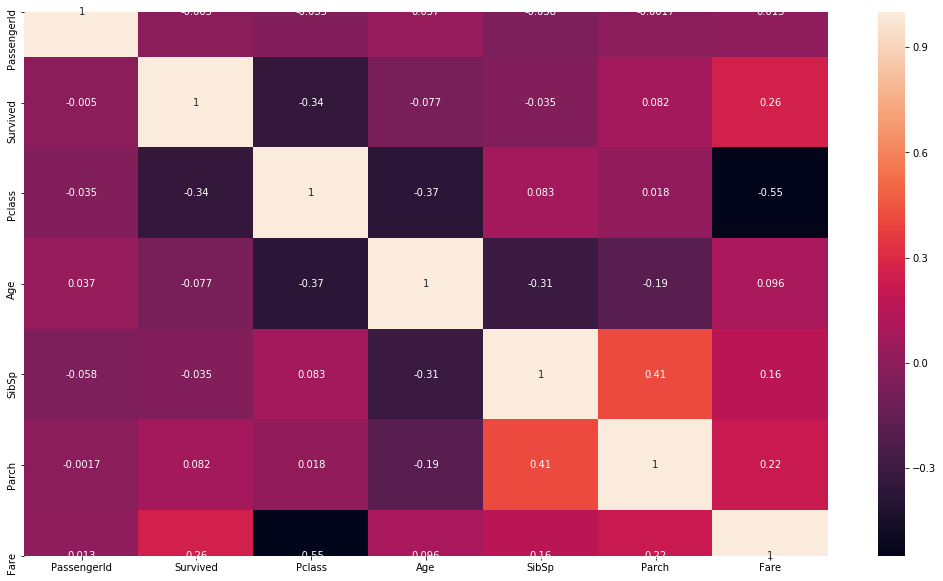

In [17]:
# correlations in figure
# build new figure and define figure size
plt.figure(figsize=(18,10))
# show coorelations in a heatmap 
# annot=True shows the correlation values
sns.heatmap(train_df.corr(),annot=True)

# seems like surviving is mostly correlated to fare
# but thats not a great correlation

# Going into detail

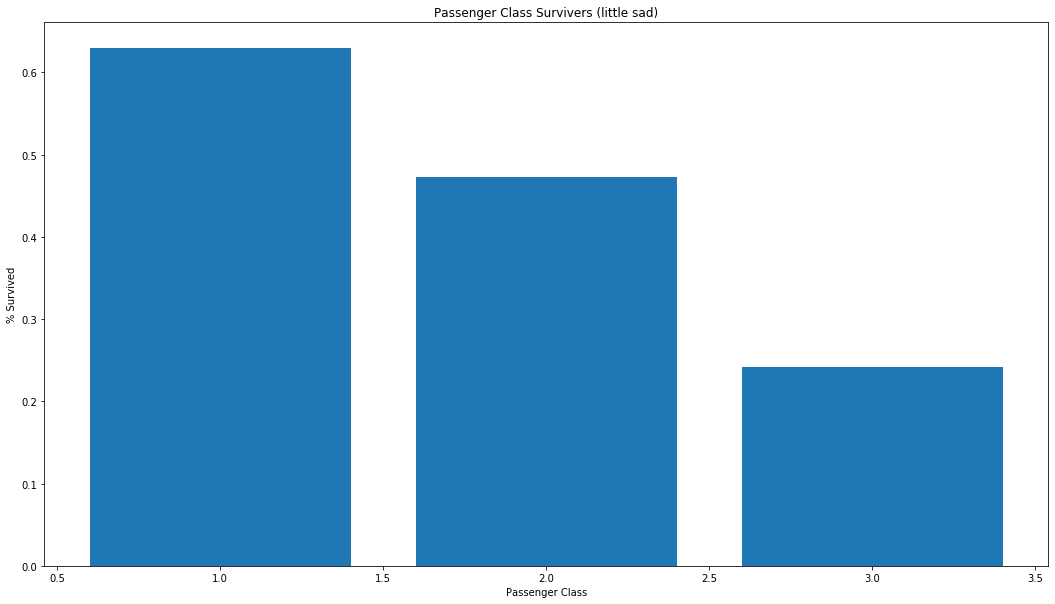

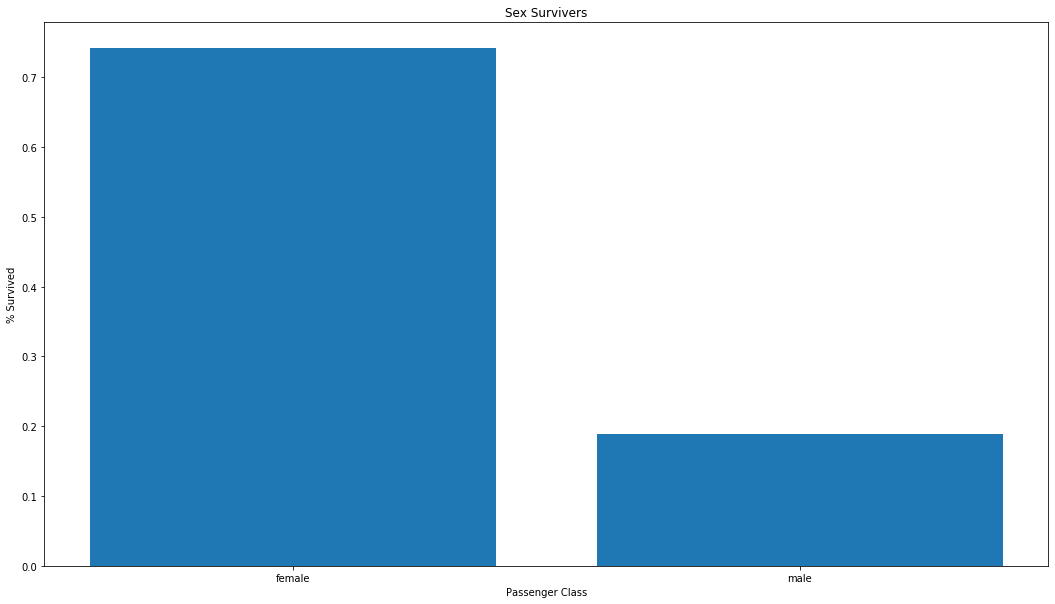

In [37]:
# group by the passenger classes
# Ok, what happens:
# 1. define the data frame groups: ['Pclass', 'Survived']
# 2. group by the relevant column of our interest 'Pclass'
# 3. build the mean and sort by survived
# as_index=False is used to specify, that our groupby value should not be the index
# otherwise plotting would be not possible before building a new index
class_group_df = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# group by sex
sex_group_df = train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# see the results
# build new figure and define figure size
plt.figure(figsize=(18,10))
plt.bar(class_group_df['Pclass'], class_group_df['Survived'])
plt.title('Passenger Class Survivers (little sad)')
# building a legend
plt.xlabel('Passenger Class')
plt.ylabel('% Survived')
plt.show()

plt.figure(figsize=(18,10))
plt.bar(sex_group_df['Sex'], sex_group_df['Survived'])
plt.title('Sex Survivers')
# building a legend
plt.xlabel('Passenger Class')
plt.ylabel('% Survived')
plt.show()

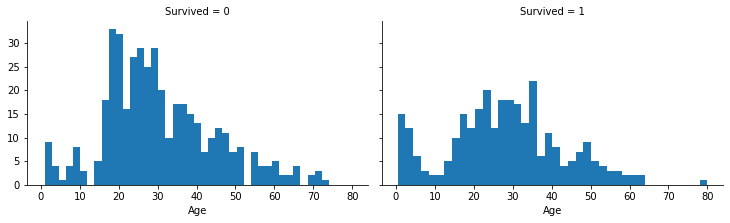

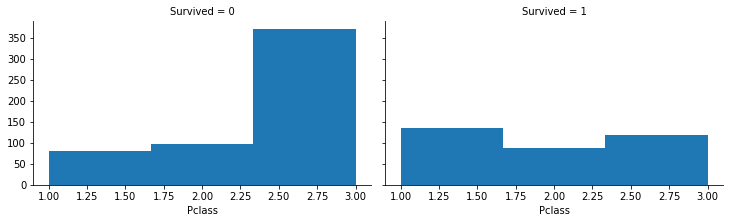

In [49]:
# that can be done a lot easier
g = sns.FacetGrid(train_df, col='Survived', size=3.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=40)

g = sns.FacetGrid(train_df, col='Survived', size=3.2, aspect=1.6)
g.map(plt.hist, 'Pclass', bins=3)

# OK, Obersations:
# kids survive, 15 to 30 year olds die, Passengers from class 3 die most likely

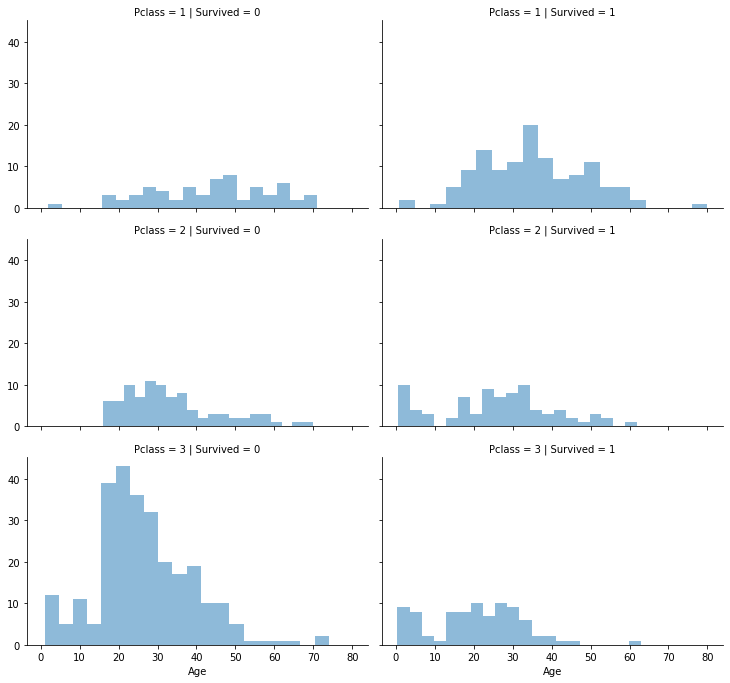

In [52]:
# go into detail about the classes, I´m still not that convinced for class 1
g_new = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=3.2, aspect=1.6)
g_new.map(plt.hist, 'Age', alpha=.5, bins=20)

# now its better:
# class 3 clearly dies, sad

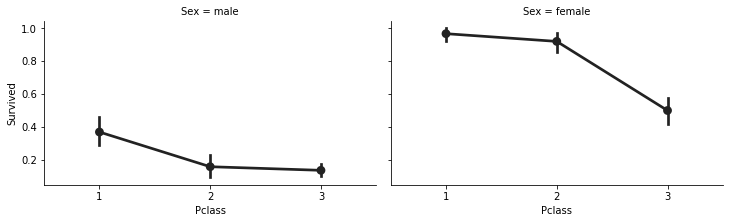

In [56]:
# ok let´s see whats about the sex
g_sex = sns.FacetGrid(train_df, col='Sex', size=3.2, aspect=1.6)
g_sex.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')

# ok, womens are clearly the survivors in all classes

# Let´s do some ML :P

In [166]:
# prepare the values
# drop the survived attribute --> thats what we search for
train_d = train_df[["Survived", "Pclass", "Sex", "Age", "Fare"]].dropna()
X_train = train_d[["Pclass", "Sex", "Age", "Fare"]]
# reset the index
X_train.reset_index(inplace=True)
Y_train = train_d["Survived"]

# test data
X_test = test_df[["Pclass", "Sex", "Age", "Fare"]].dropna()
X_test.reset_index(inplace=True)

# transform sex to values (1 for women, 0 for men)
X_train["Sex"] = np.where(X_train['Sex'] == "male", 0, 1)
X_test["Sex"] = np.where(X_test['Sex'] == "male", 0, 1)

# see the shapes
X_train.shape, Y_train.shape, X_test.shape

((714, 5), (714,), (331, 5))

In [182]:
# Logistic Regression
reg = LogisticRegression()
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_test)
# evaluate the score
reg_acc = reg.score(X_train, Y_train)
# model score
print(round(reg_acc * 100, 2))

# not that bad at all

79.13


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Try some other algorithims

In [175]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)

# evaluate the score
rf_acc = rf.score(X_train, Y_train)
# model score
print(round(rf_acc * 100, 2))

# ok that shouldn´t be possible

98.04


In [183]:
# Neighrest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

# evaluate the score
knn_acc = knn.score(X_train, Y_train)
# model score
print(round(knn_acc * 100, 2))

79.27


# Try some grouping

In [193]:
# if we group our features in a way we see the correlations,
# our model could perfom better

# what about family size
for dataset in combined_df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

# ok, we see that family size of 4 is ideal to survive

# lets build the features with family size instad of fare
train_d = train_df[["Survived", "Pclass", "Sex", "FamilySize"]].dropna()
X_train = train_d[["Pclass", "Sex", "FamilySize"]]
# reset the index
X_train.reset_index(inplace=True)
Y_train = train_d["Survived"]

# test data
X_test = test_df[["Pclass", "Sex", "FamilySize"]].dropna()
X_test.reset_index(inplace=True)

# transform sex to values (1 for women, 0 for men)
X_train["Sex"] = np.where(X_train['Sex'] == "male", 0, 1)
X_test["Sex"] = np.where(X_test['Sex'] == "male", 0, 1)

# see the shapes
X_train.shape, Y_train.shape, X_test.shape



# sets use our best algorithm to test the new feature
# Neighrest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

y_pred = knn.predict(X_test)

# evaluate the score
knn_acc = knn.score(X_train, Y_train)
# model score
print(round(knn_acc * 100, 2))

# thats better

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
80.25
